# Método de Euler

#### Método numerico para ecuaciones de la forma $\frac{dy}{dx}=f(x,y)$ con condición inicial $y(x_0)=y_0$

Dada la condición inicial $y(x_0)=y_0$ y el tamaño de paso $\Delta x$, calculamos el punto $(𝑥_{𝑛+1},𝑦_{𝑛+1})$ a partir del punto precedente $(𝑥_𝑛,𝑦_𝑛)$ con los siguientes pasos:

1. Usamos la ecuación diferencial para determinar la pendiente $𝑓(𝑥_𝑛,𝑦_𝑛)$
2. Calculamos el siguiente punto $(𝑥_{𝑛+1},𝑦_{𝑛+1})$ mediante las fórmulas:
$$𝑥_{𝑛+1}=𝑥_𝑛+\Delta 𝑥$$
$$𝑦_{𝑛+1}=𝑦_𝑛+𝑓(𝑥_𝑛,𝑦_𝑛)\Delta 𝑥$$
$$𝑛=0,1,2,…$$

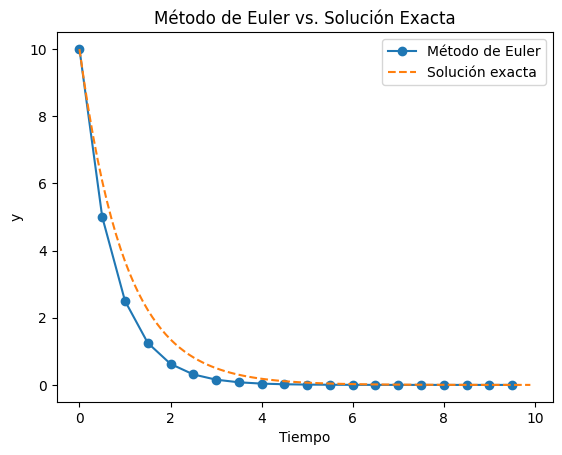

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
dt = .5   # Tamaño del paso
dte=0.1
t_max = 10  # Tiempo total

# Condición inicial
y0 = 10

# Discretización del tiempo
t = np.arange(0, t_max, dt)
t_ex = np.arange(0, t_max, dte)
N = len(t)

# Inicialización del array de soluciones
y = np.zeros(N)
y[0] = y0  # Valor inicial

# Aplicación del método de Euler
for i in range(1, N):
    y[i] = y[i-1] + dt * (-y[i-1])  # y' = -y
    # print(y[i])
# Solución exacta para comparar
y_exacta = y0 * np.exp(-t_ex)

# Graficar resultado
plt.plot(t, y, label="Método de Euler", marker="o")
plt.plot(t_ex, y_exacta, label="Solución exacta", linestyle="--")
plt.xlabel("Tiempo")
plt.ylabel("y")
plt.title("Método de Euler vs. Solución Exacta")
plt.legend()
plt.show()